# Make a JRA55 scaling file

see https://github.com/OceansAus/access-om2/issues/133

and https://arccss.slack.com/archives/D8BRL3VAS/p1548985462015100

and Ice_Crash_ACCESS-OM2-01.ipynb


Make individual compressed netCDF scaling files `RYF.[uv]_10_scale.1984_1985.nc` for each wind speed component, that each have a single float field `[uv]as_10m` with the same 320x640 spatial dimensions as `[uv]as_10m` in `RYF.[uv]_10.1984_1985.nc` but with a time dimension that is very sparse.

One important thing is to make sure the variable naming is the same as the forcing as well as setting out the time dimension and attributes/units in the same way.

In [1]:
import xarray as xr
import cftime
import datetime
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import cmocean as cm
import os

In [2]:
# plotting routine, mostly copied from Ice_Crash_ACCESS-OM2-01
# but JRA longitude range is 0-360
def plotfig(ds, t):
    datestr = ds.time.data[t].strftime()
    ds = ds.isel(time=t)

    varname = list(ds.data_vars.keys())[0]  # NB: assumes only one data variable
    view = 'Aug_crash'

#     view = 'Arctic'

#     view = 'Agulhas'
#     view = 'EAC'
#     view = 'Gulf_Stream'

    desc = ds[varname].long_name + ' ' + varname + ' (' + ds[varname].units + '), ' + datestr
    levels = np.arange(-20,20.01,1)
    ticks = np.arange(levels[0],levels[-1]+.001,5)
    
#     for scaling field
#     levels = np.arange(0,1.001,.01)
#     ticks = np.arange(levels[0],levels[-1]+.001,.1)

    ext = 'both'
    cmp = cm.cm.balance
    
    font = {'size':24}
    tick_font=14
    parlabels = [False,False,False,False]


    fig = plt.figure(figsize=(10,10))
    if view == 'Arctic':
        m = Basemap(projection ='npstere',boundinglat=45,lon_0=-10+360,resolution='l')
    elif view == 'Arctic_closeup':
        m = Basemap(projection ='npstere',boundinglat=70,lon_0=-10+360,resolution='l')
    elif view == 'Aug_crash':
#         m = Basemap(projection='stere',llcrnrlat=67,urcrnrlat=75,
#                     llcrnrlon=-110+360,urcrnrlon=-90+360,lat_0=75,lon_0=-100+360,resolution='l')
        m = Basemap(projection='cyl',llcrnrlat=60,urcrnrlat=80,
                    llcrnrlon=-110+360,urcrnrlon=-90+360,lat_0=75,lon_0=-100+360,resolution='l')
        parlabels = [True,False,False,True]
    elif view == 'May_crash':
        m = Basemap(projection='stere',llcrnrlat=66,urcrnrlat=85,
                    llcrnrlon=70,urcrnrlon=110,lat_0=75,lon_0=80,resolution='l')
    elif view == 'tripole_bug':
        m = Basemap(projection='stere',llcrnrlat=72,urcrnrlat=85,
                    llcrnrlon=70,urcrnrlon=110,lat_0=75,lon_0=80,resolution='l')
    elif view == 'EAC':
        m = Basemap(projection='cyl',
                    llcrnrlon=142-360+360,urcrnrlon=175-360+360,
                    llcrnrlat=-48,urcrnrlat=-20,
                    resolution='l')
        parlabels = [True,False,False,True]
    elif view == 'Agulhas':
        m = Basemap(projection='cyl',
                    llcrnrlon=0,urcrnrlon=50,
                    llcrnrlat=-48,urcrnrlat=-15,
                    resolution='l')
        parlabels = [True,False,False,True]
    elif view == 'Kuroshio':
        m = Basemap(projection='cyl',
                    llcrnrlon=125-360+360,urcrnrlon=165-360+360,
                    llcrnrlat=25,urcrnrlat=50,
                    resolution='l')
        parlabels = [True,False,False,True]
    elif view == 'Gulf_Stream':
        m = Basemap(projection='cyl',
                    llcrnrlon=-98+360,urcrnrlon=-50+360,
                    llcrnrlat=15,urcrnrlat=45,
                    resolution='l')
        parlabels = [True,False,False,True]
    elif view == 'ACC':
        m = Basemap(projection ='spstere',boundinglat=-30,lon_0=170,resolution='l')
        parlabels = [False,False,False,False]
    else:
        m = Basemap(projection ='spstere',boundinglat=-50,lon_0=170,resolution='l')

    # m = Basemap(projection ='ortho',resolution='l',lat_0=90,lon_0=45,
    #            llcrnrx=-m.urcrnrx/2.,llcrnry=-m.urcrnry/2.,urcrnrx=m.urcrnrx/2.,urcrnry=m.urcrnry/2.)
    # #             llcrnrlat=60,urcrnrlat=60,
    # #             llcrnrlon=-45,urcrnrlon=45)
    # #             llcrnrlon=loncorners[0],urcrnrlon=loncorners[2]) ,boundinglat=48
#     x,y = m(*(ds.longitude.data,ds.latitude.data))

#     x,y = m(ds.longitude.data,ds.latitude.data)

#     x,y = m((ds.longitude.data,ds.latitude.data))

    x, y = np.meshgrid(ds.longitude.data, ds.latitude.data)



    ctr = m.contourf(x,y,ds[varname].data,levels=levels,cmap=cmp, extend=ext) #, vmin=0, vmax=1.1)

#     ctr = m.contourf(x,y,ds.uas_10m.data,levels=levels,cmap=cmp, extend=ext) #, vmin=0, vmax=1.1)

    #                 ctr.cmap.set_under(color=cmp(np.min(levels)), alpha=None)
    #                 ctr.cmap.set_over(color=cmp(np.max(levels)), alpha=None)
    ctr.cmap.set_under(color=cmp(0), alpha=None)
    ctr.cmap.set_over(color=cmp(.999), alpha=None)
    #                 if view.startswith('Arctic'):
    #                     xobs,yobs = m(*(obs_lon_NH,obs_lat_NH))
    #                     m.contour(xobs,yobs,CN_obs_NH[month-1],[0.3],colors='r')
    #                 else:
    #                     xobs,yobs = m(*(obs_lon_SH,obs_lat_SH))
    #                     m.contour(xobs,yobs,CN_obs_SH[month-1],[0.3],colors='r')

#     plt.title(,font)
    cbar = m.colorbar(ctr, location = 'bottom', pad = "12%")
    cbar.set_label(desc,size=tick_font)
    cbar.set_ticks(ticks)
#     cbar_labels=plt.getp(cbar.ax.axes,'xticklabels')
#     plt.setp(cbar_labels,fontsize=tick_font)
    m.drawmapboundary(fill_color='gray') # background color - for non-ocean areas
    # fill continents, set lake color same as ocean color.
    m.fillcontinents(color='gray',lake_color='gray')
    # draw parallels and meridians.
    # label parallels on right and top
    # meridians on bottom and left
    parallels = np.arange(-80.,81,10.)
    # labels = [left,right,top,bottom]
    #                 m.drawparallels(parallels,color='white')#,labels=[False,True,True,False],size=tick_font)
    m.drawparallels(parallels,color='white',labels=parlabels,size=tick_font)

    #                 meridians = np.arange(0.,351.,20.)
    meridians = np.arange(0.,351.,10.)
    m.drawmeridians(meridians,labels=[True,False,False,True],size=tick_font,color='white')
#     savefigure(outname)
#     plt.close()

YATM multiplies the field (e.g. wind components) by a scaling field. 

Scaling is defined by 1 plus a Gaussian in x,y,t, with amplitude A (so 0<A<1 reduces the field).

Gaussian is centred at xpos, ypos, tpos 

with scales xscale, yscale (in degrees) and tscale (in days)

$\text{scale} = 1 + A\exp(-((x-x_\text{pos})/x_\text{scale})^2 -((y-y_\text{pos})/y_\text{scale})^2 -((t-t_\text{pos})/t_\text{scale})^2)$

In [3]:
files = ['/g/data1/ua8/JRA55-do/RYF/v1-3/RYF.u_10.1984_1985.nc',
         '/g/data1/ua8/JRA55-do/RYF/v1-3/RYF.v_10.1984_1985.nc']

tstart = cftime.DatetimeNoLeap(1900, 8, 11, 0, 0, 0, 0)  # start of window in which scaling will be applied
tend = cftime.DatetimeNoLeap(1900, 8, 14, 0, 0, 0, 0)  # start of window in which scaling will be applied

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-18.10/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


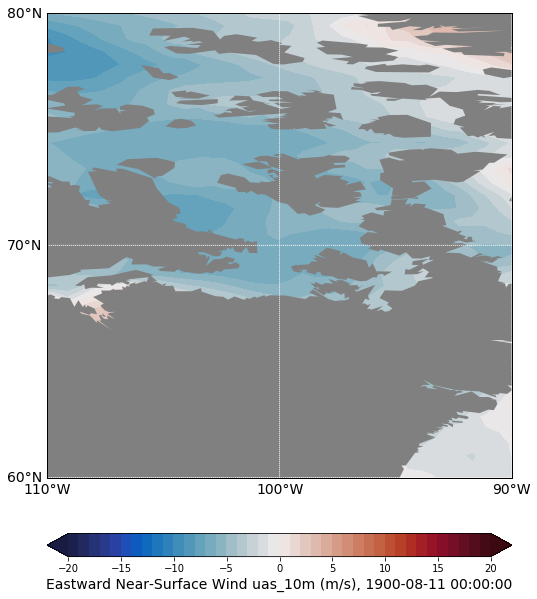

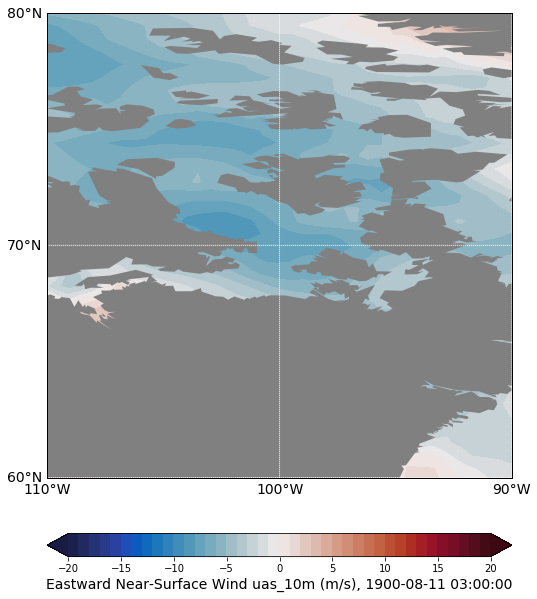

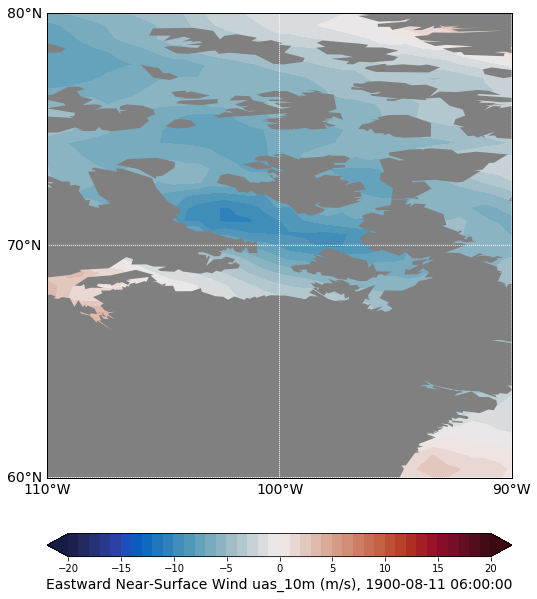

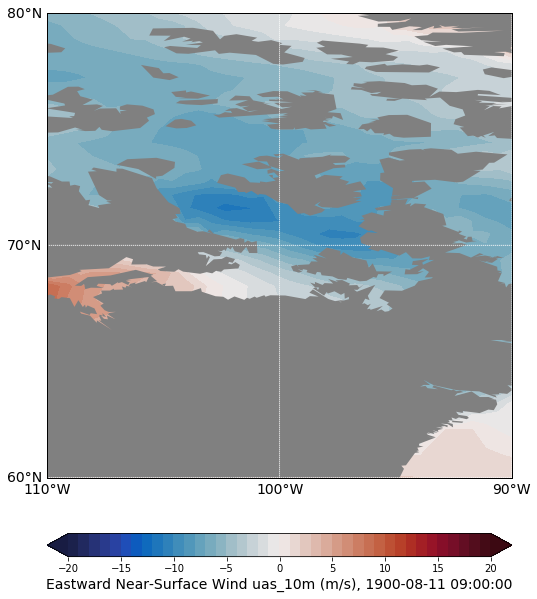

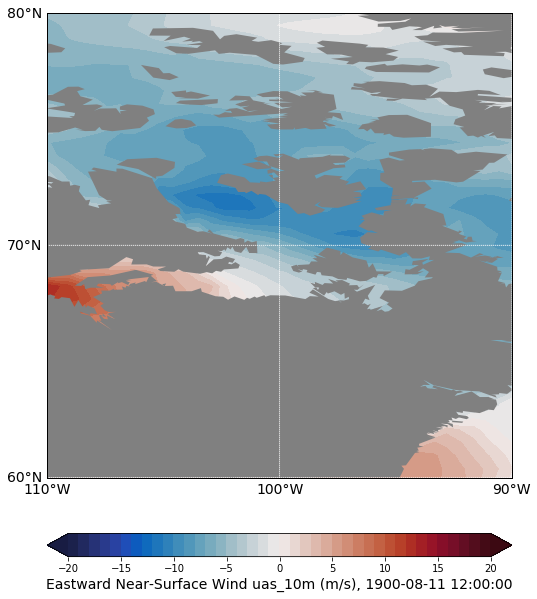

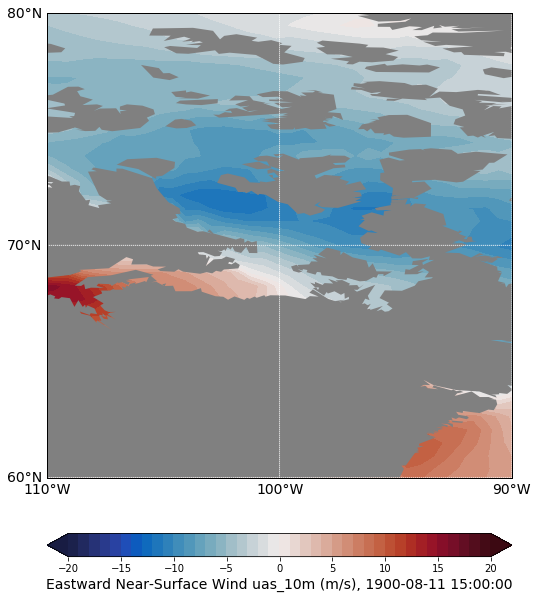

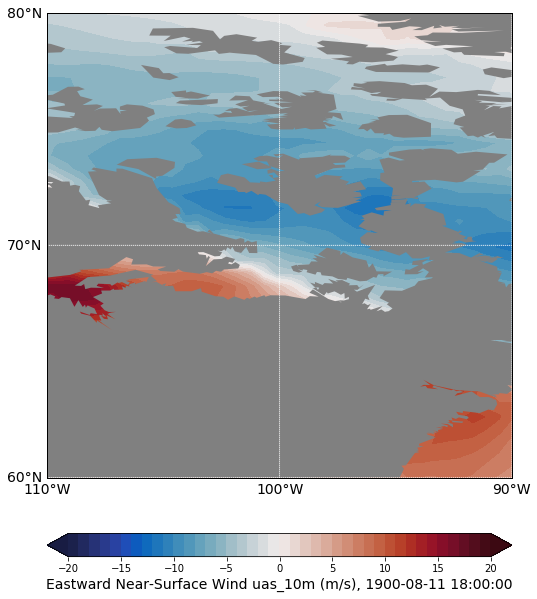

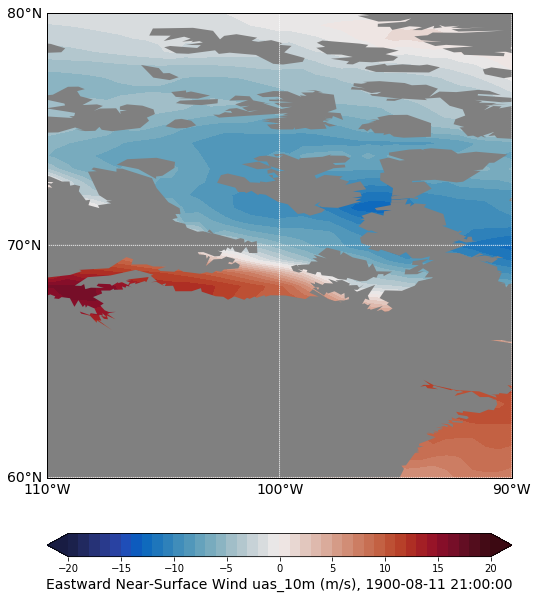

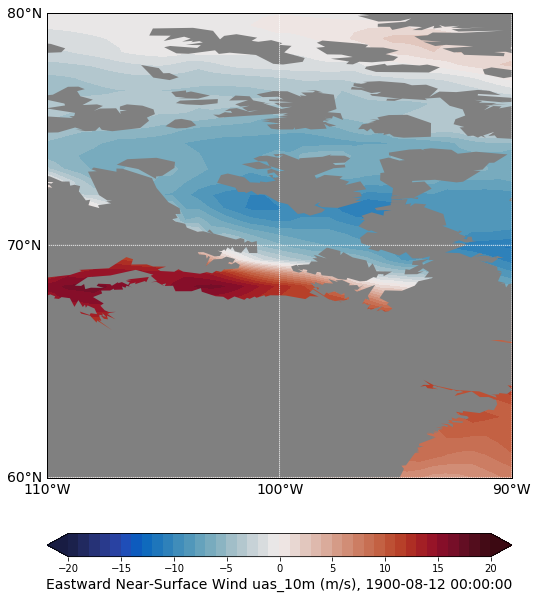

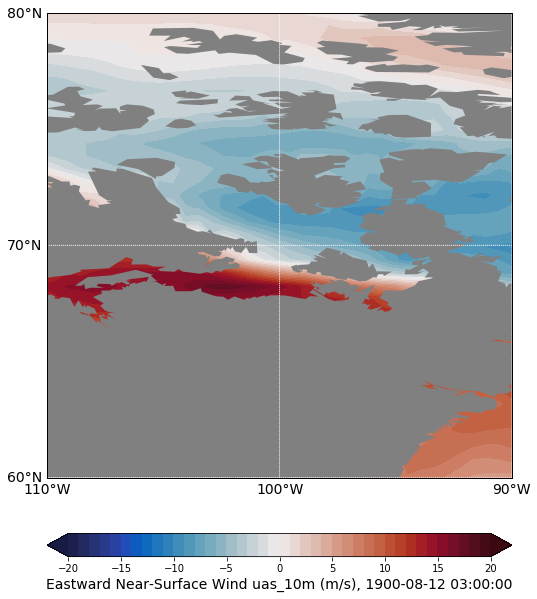

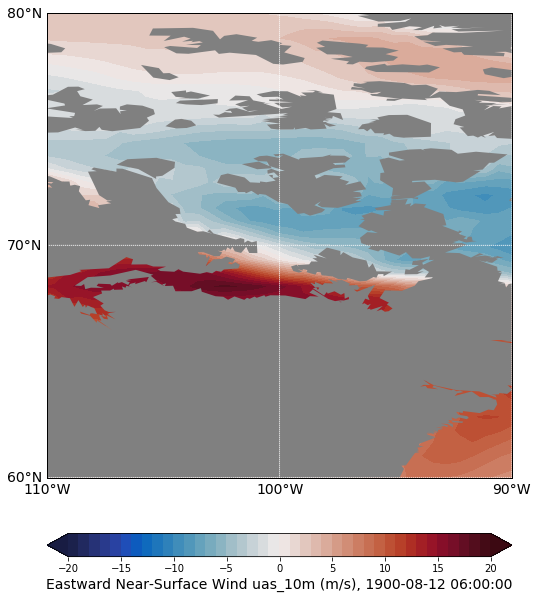

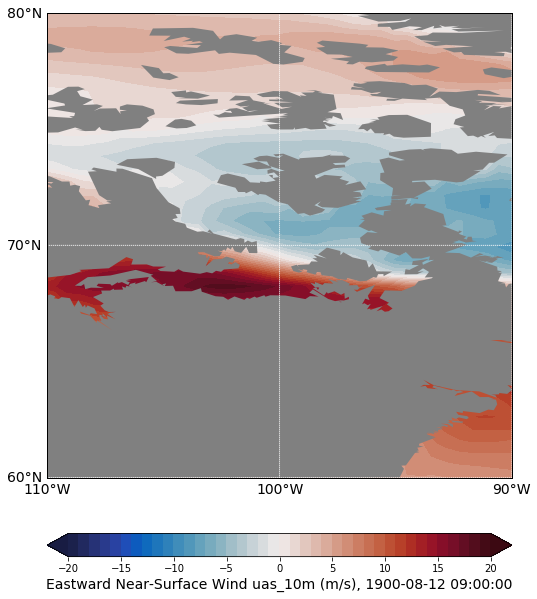

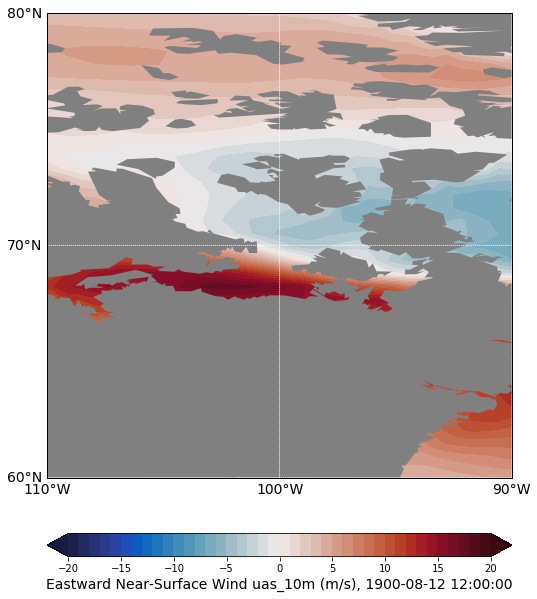

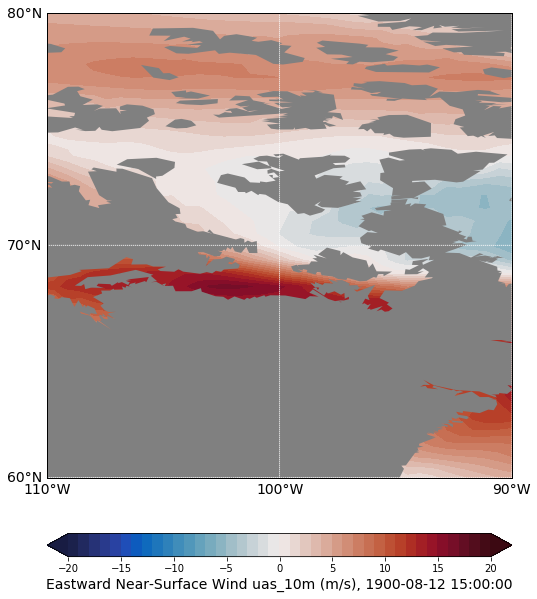

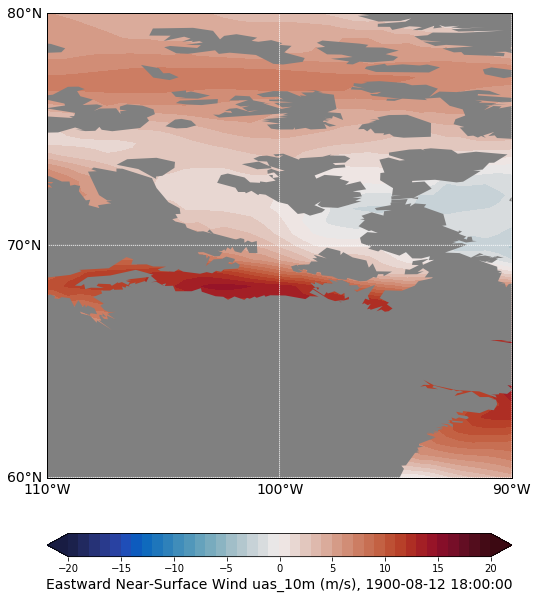

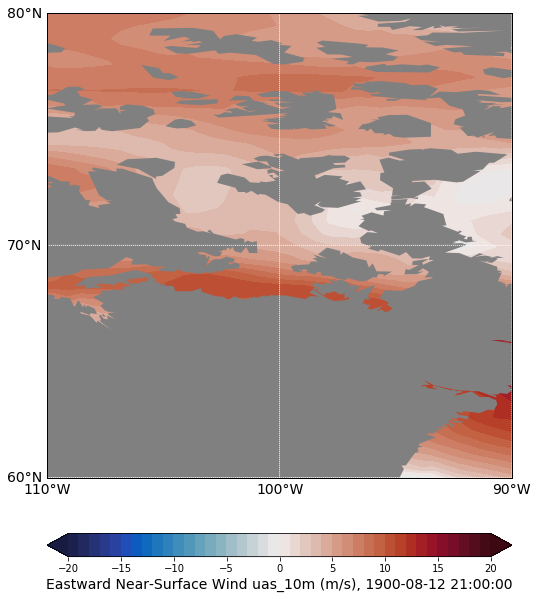

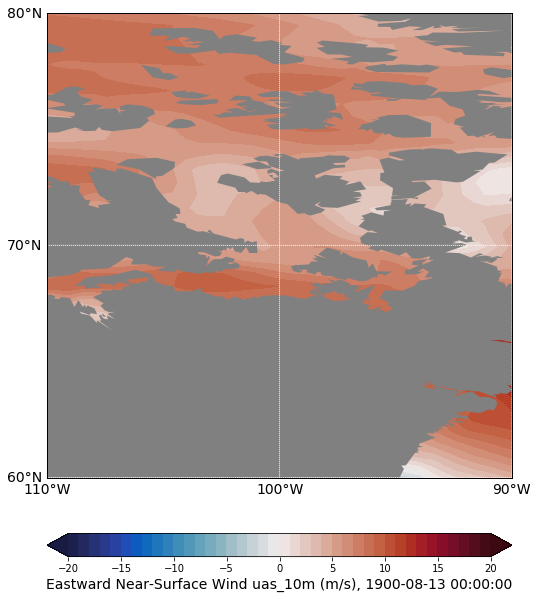

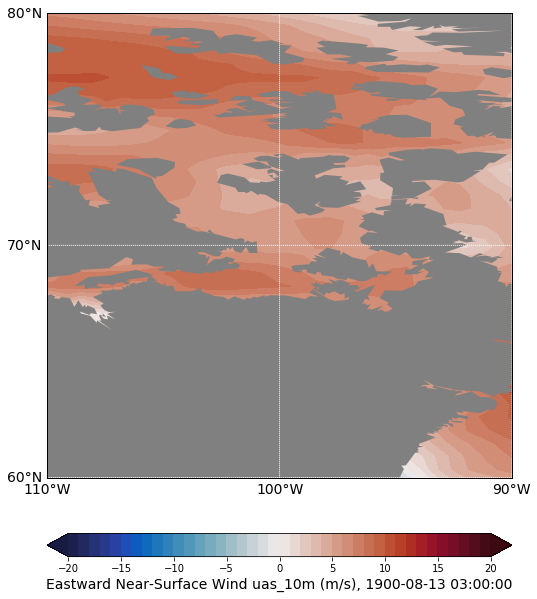

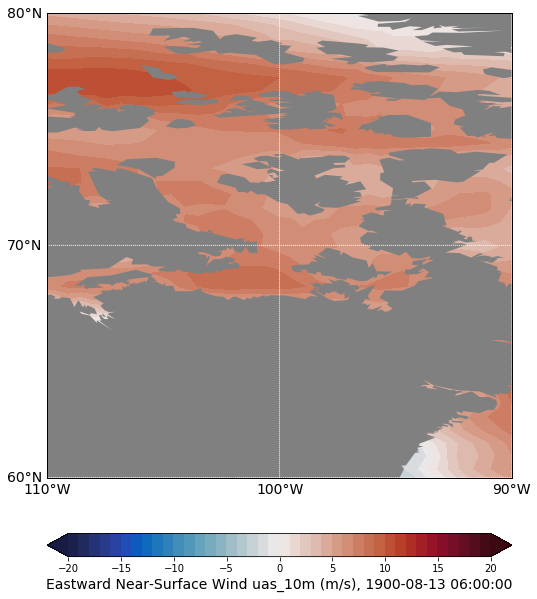

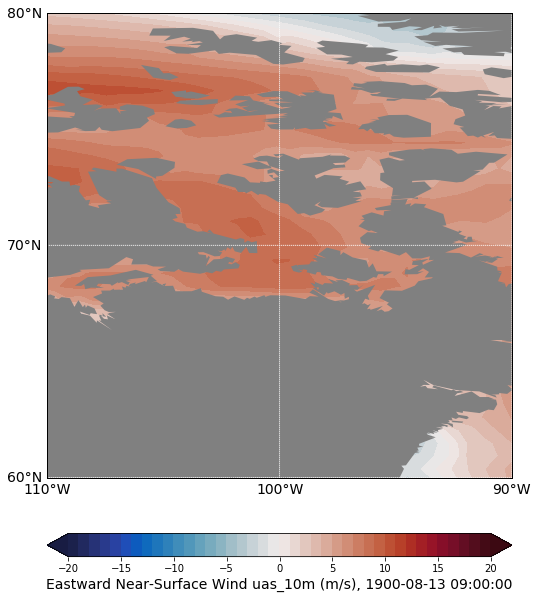

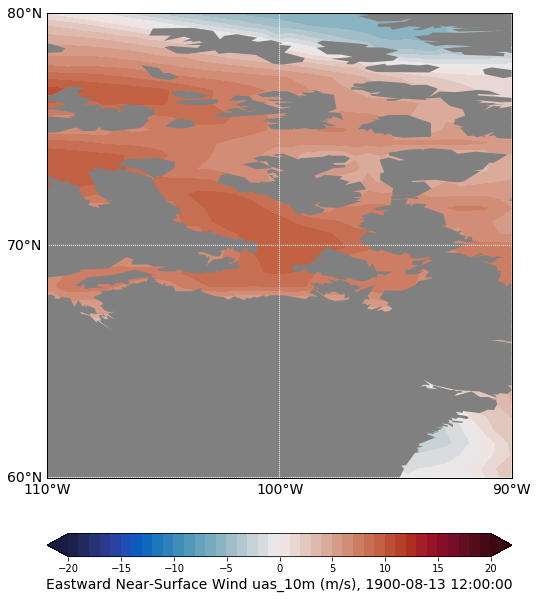

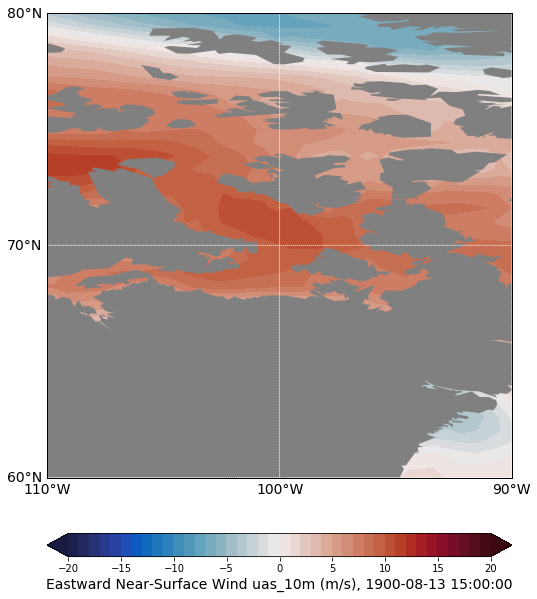

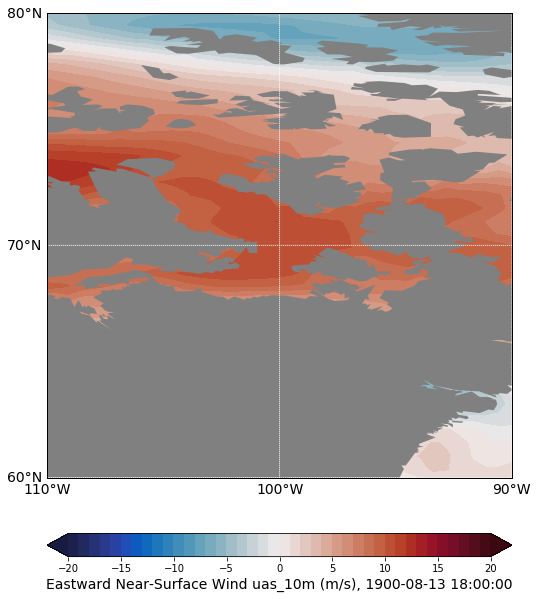

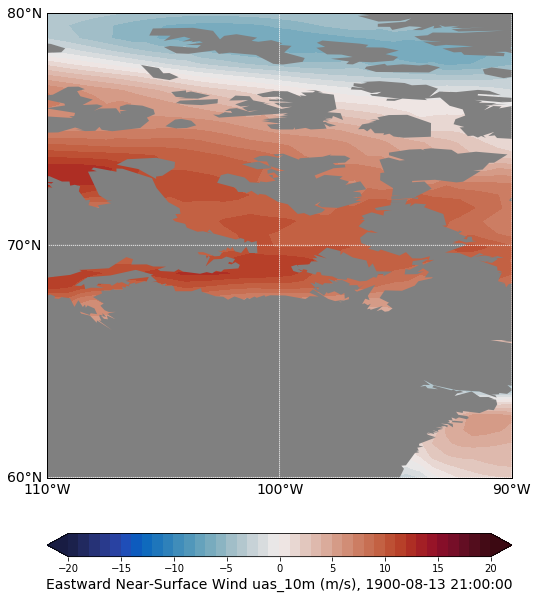

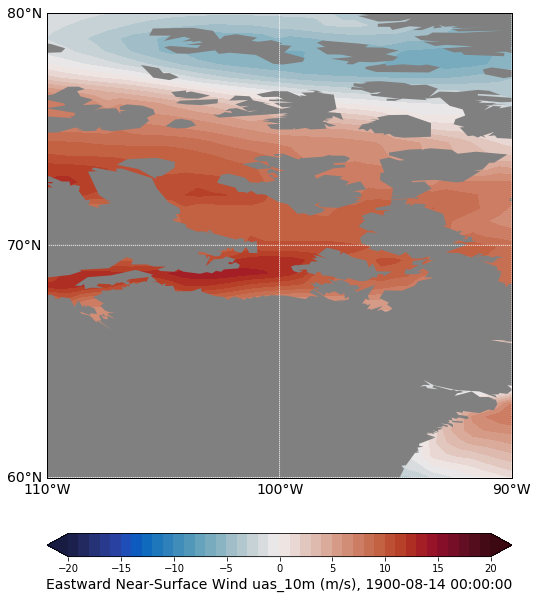

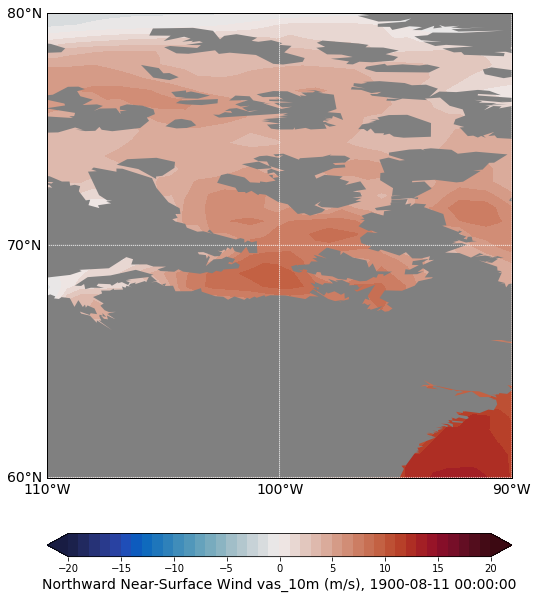

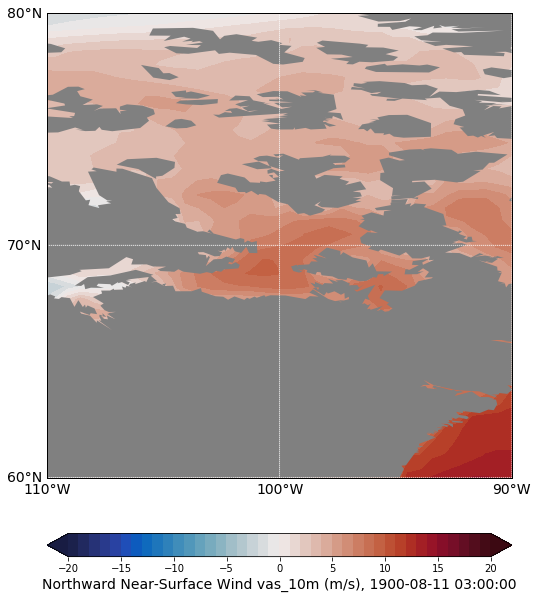

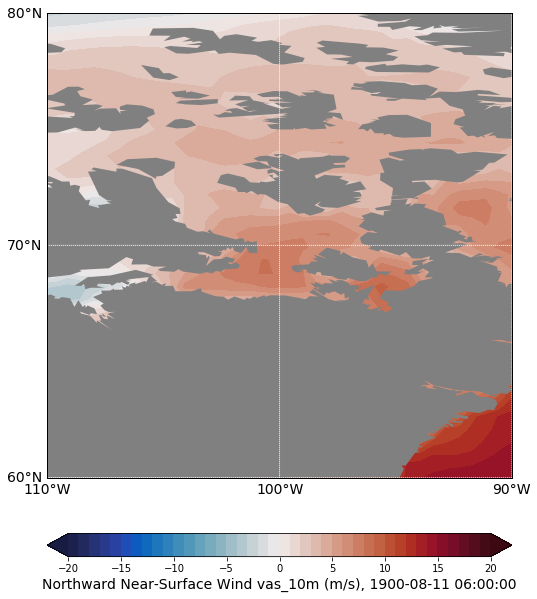

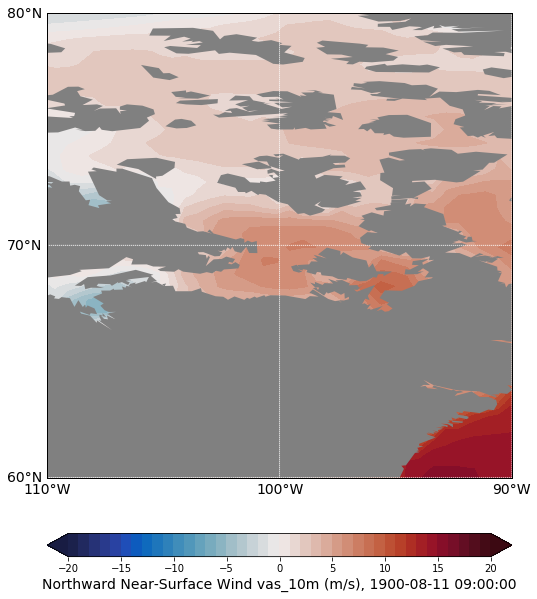

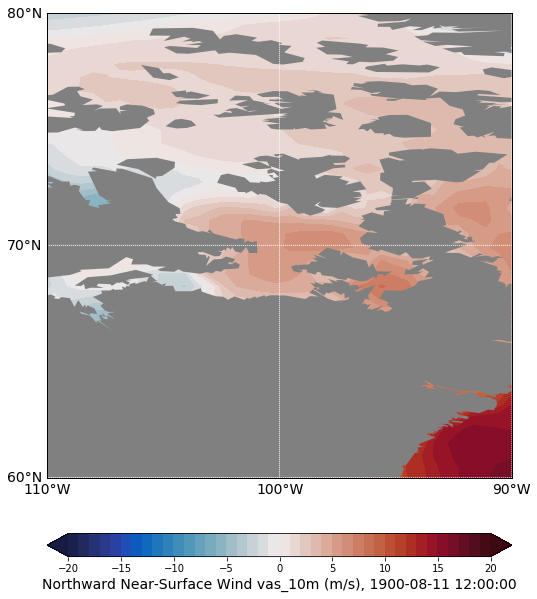

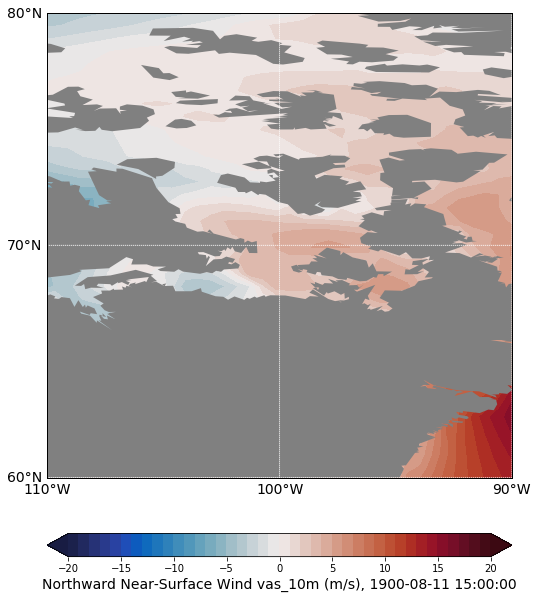

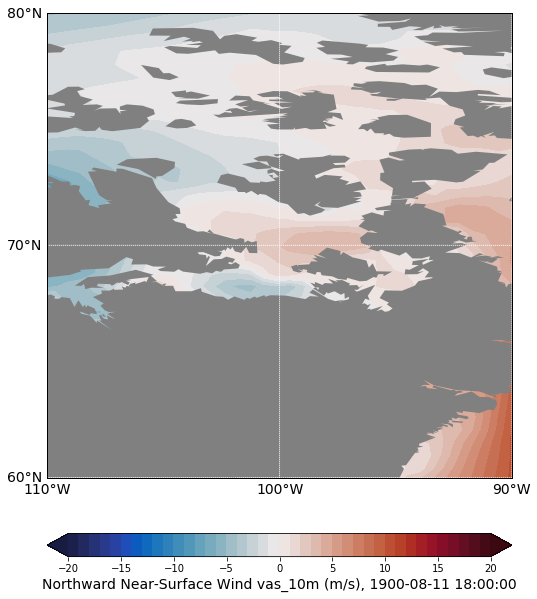

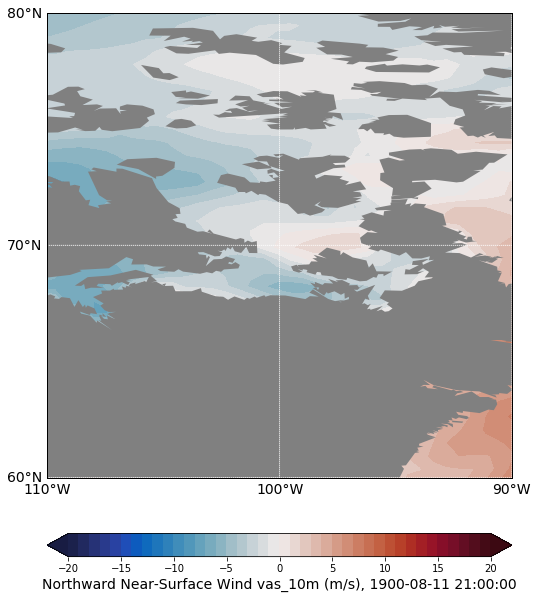

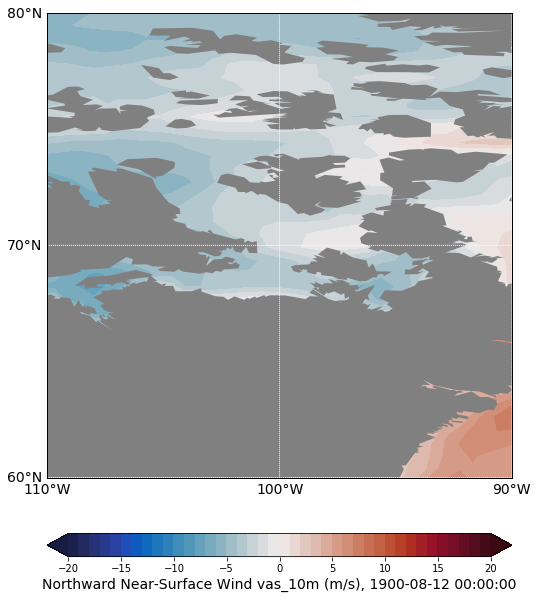

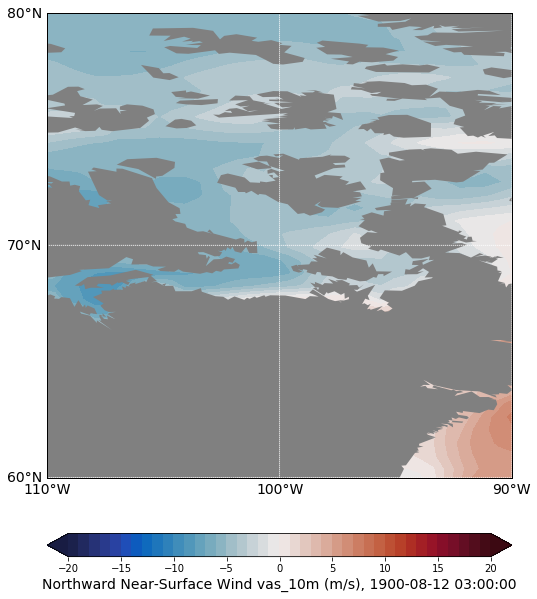

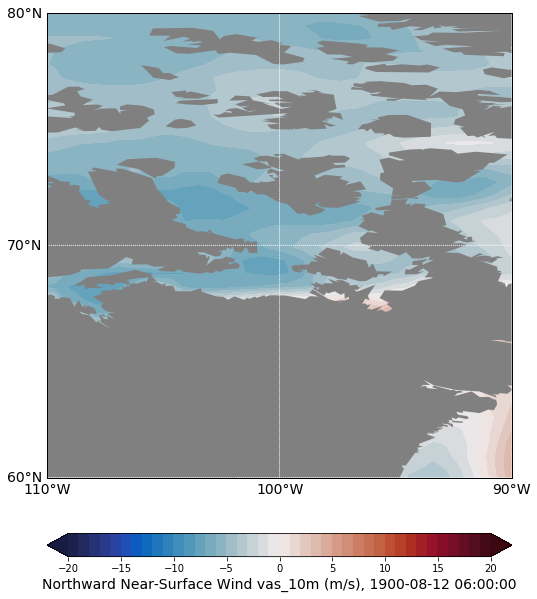

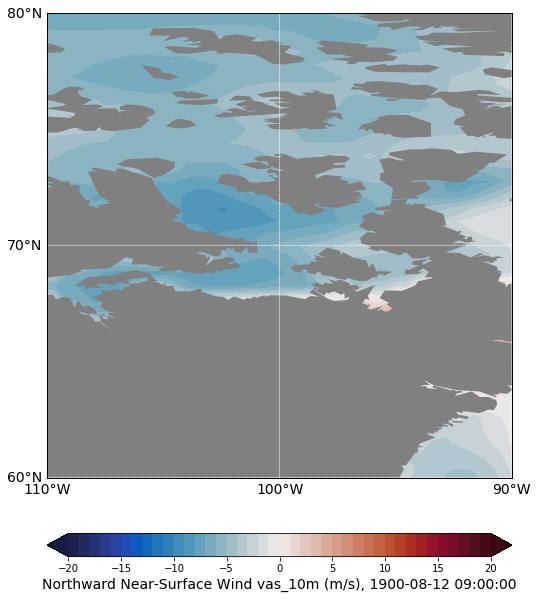

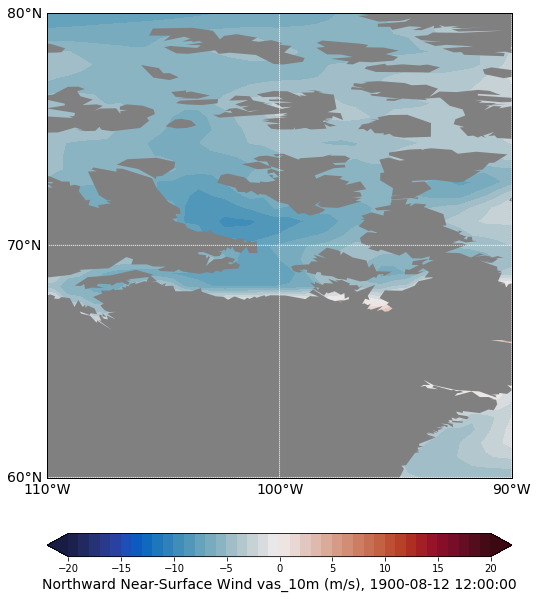

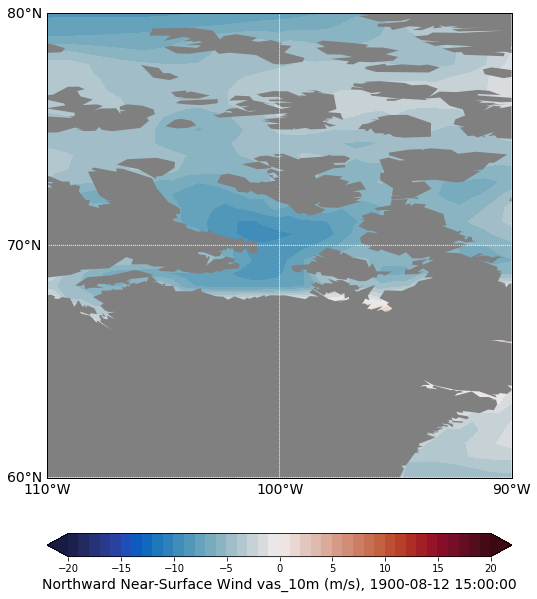

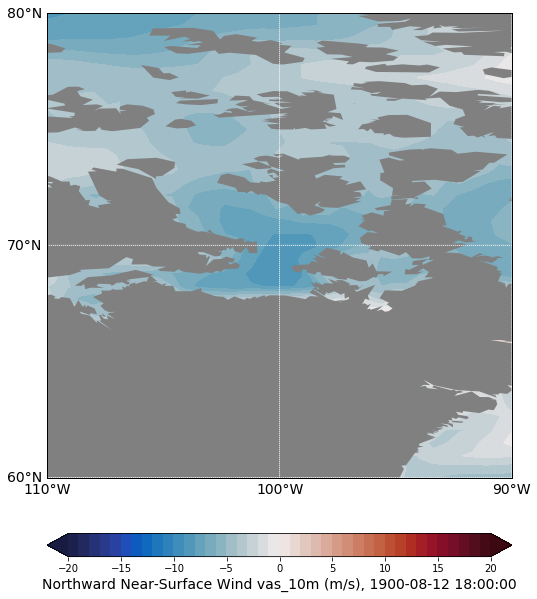

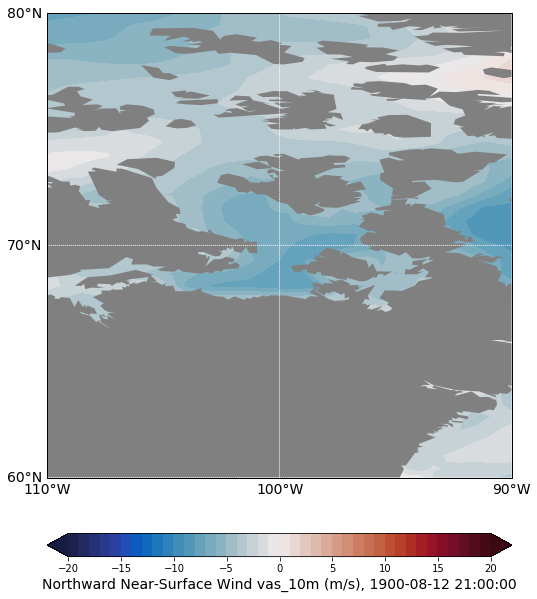

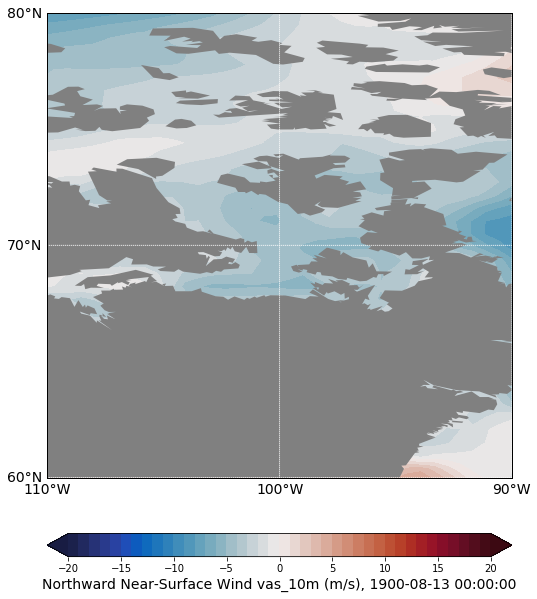

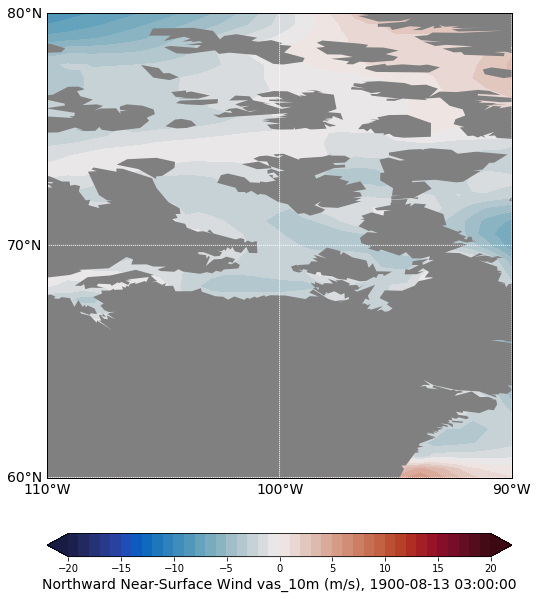

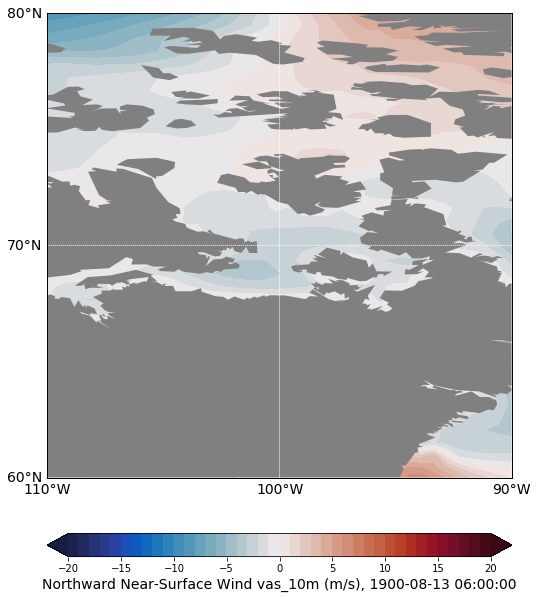

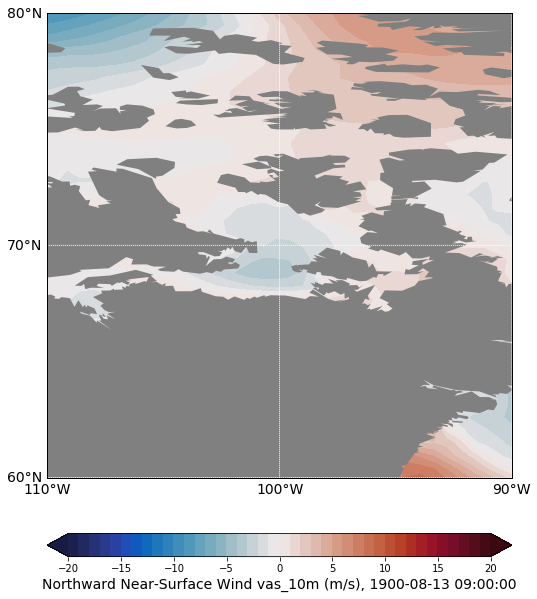

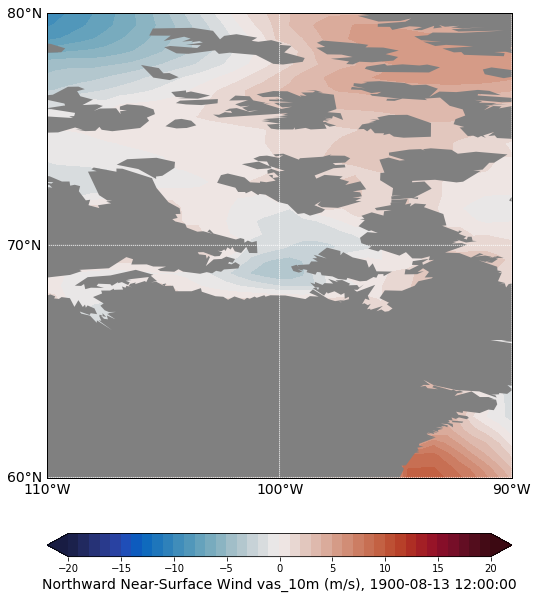

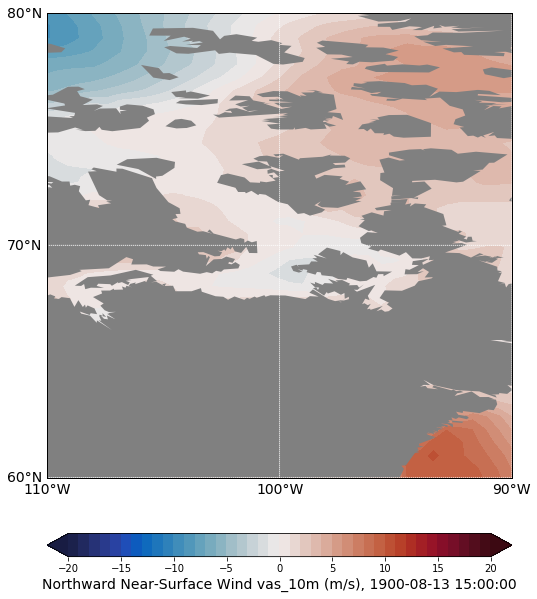

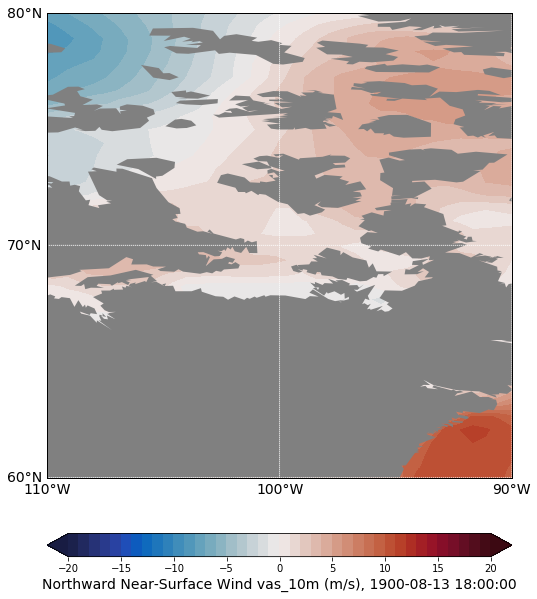

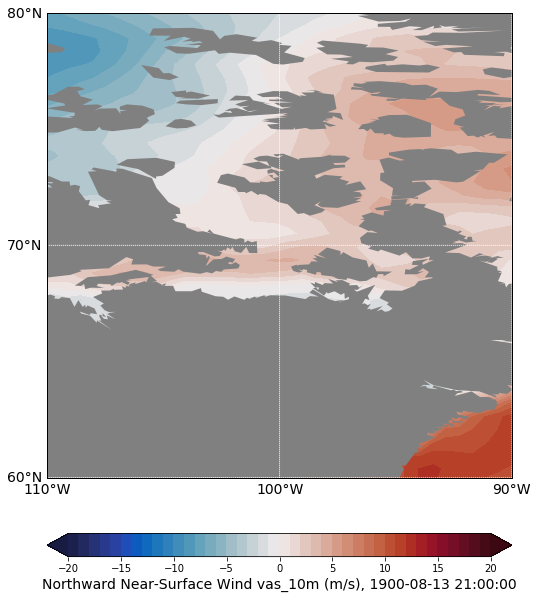

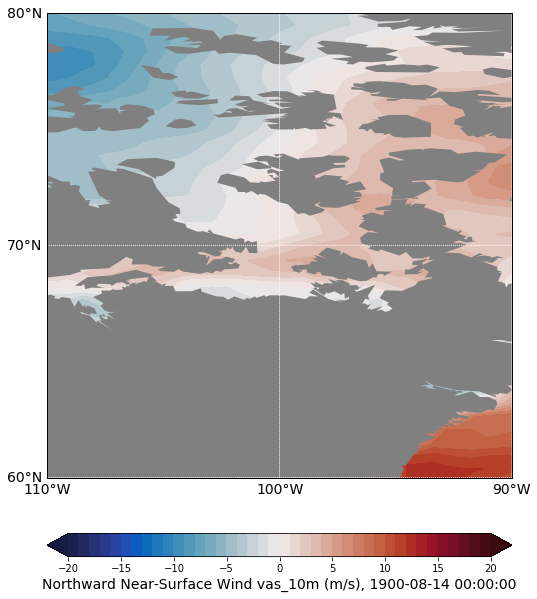

In [4]:
# first plot JRA data to identify location and time when scaling should be applied
for file in files:
    ds = xr.open_dataset(file).sel(time=slice(tstart,tend))
    for t in range(len(ds.time)):
        plotfig(ds, t)

In [5]:
def Gaussian(ds, xpos, ypos, tpos, xscale, yscale, tscale, amp):
    '''
    Scaling field: Gaussian in x,y,t
    '''
    varname = list(ds.data_vars.keys())[0]  # NB: assumes only one data variable
    x, y = np.meshgrid(ds.longitude.data, ds.latitude.data)
    spatial = np.exp(
             -((x-xpos)/xscale)**2 
             -((y-ypos)/yscale)**2 )
    for t in ds.time:
        tdiff = (ds.time.loc[dict(time=t)].data-tpos).total_seconds()/24/60/60
        scaling_field = 1 + amp*spatial*np.exp(-(tdiff/tscale)**2)
        ds[varname].loc[dict(time=t)] = scaling_field
    return

In [11]:
# now make the scaling field, preserving the JRA55-do file structure

# NB: should scale both components of wind by the same factor so we don't alter wind direction

# x,y,t location of Gaussian centre
xpos = -100+360  # in degrees, centred on the tripole longitude 100W
ypos = 68  # in degrees, just off the coast
tpos = cftime.DatetimeNoLeap(1900, 8, 12, 9, 0, 0, 0)  # time of strongest scaling

# x,y,t scale of Gaussian
xscale = 4  # degrees
yscale = 1  # degrees
tscale = 0.5  # days

amp = -0.6  # amplitude of Gaussian at centre

for file in files:
    outfile = os.path.basename(file).replace('.nc', '_scale.nc')
    print(outfile)
    ds_unscaled = xr.open_dataset(file).sel(time=slice(tstart,tend))
    ds = xr.open_dataset(file).sel(time=slice(tstart,tend))
    Gaussian(ds, xpos, ypos, tpos, xscale, yscale, tscale, amp)
    ds.attrs.update({'title': 'Scaling for ' + ds.attrs['title']})    
    ds.attrs.update({'history': 'Created ' +
                datetime.datetime.now().replace(microsecond=0).astimezone().isoformat() + 
                ' by ' + os.getlogin() + 
                ' with https://github.com/aekiss/notebooks/make-jra55-scaling.ipynb based on ' + 
                file + ' with xpos, ypos, tpos, xscale, yscale, tscale, amp = ' +
                ', '.join([str(x) for x in [xpos, ypos, tpos, xscale, yscale, tscale, amp]])
                })
#     plot scaled fields
#     for t in range(len(ds.time)):
#         scaled = ds*ds_unscaled
#         scaled.uas_10m.attrs.update(ds.uas_10m.attrs)
#         plotfig(scaled, t)
# #         break
    ds.to_netcdf(outfile)

    

RYF.u_10.1984_1985_scale.nc
RYF.v_10.1984_1985_scale.nc
